## Predicting Game Outcomes for CS GO

Data source: https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [5]:
data = pd.read_csv('csgo_round_snapshots.csv')
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,ct_weapon_m4a4,t_weapon_m4a4,ct_weapon_mac10,t_weapon_mac10,ct_weapon_mag7,t_weapon_mag7,ct_weapon_mp5sd,t_weapon_mp5sd,ct_weapon_mp7,t_weapon_mp7,ct_weapon_mp9,t_weapon_mp9,ct_weapon_negev,t_weapon_negev,ct_weapon_nova,t_weapon_nova,ct_weapon_p90,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,T

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

### Preprocessing

In [7]:
df = data.copy()

In [11]:
df.isnull().sum().sum()

np.int64(0)

In [13]:
df.drop(df.select_dtypes(np.number), axis=1)

,map,bomb_planted,round_winner
0,de_dust2,False,CT
1,de_dust2,False,CT
2,de_dust2,False,CT
3,de_dust2,False,CT
4,de_dust2,False,CT
...,...,...,...
122405,de_train,True,T
122406,de_train,False,T
122407,de_train,False,T
122408,de_train,False,T


In [14]:
df['bomb_planted'] = df['bomb_planted'].astype(np.int16)

In [16]:
df.drop(df.select_dtypes(np.number), axis=1)

,map,round_winner
0,de_dust2,CT
1,de_dust2,CT
2,de_dust2,CT
3,de_dust2,CT
4,de_dust2,CT
...,...,...
122405,de_train,T
122406,de_train,T
122407,de_train,T
122408,de_train,T


In [17]:
encoder = LabelEncoder()

df['map'] = encoder.fit_transform(df['map'])

for name, label in enumerate(encoder.classes_):
    print(name, label)

0 de_cache
1 de_dust2
2 de_inferno
3 de_mirage
4 de_nuke
5 de_overpass
6 de_train
7 de_vertigo


In [18]:
map_mappings = {index:label for index, label in enumerate(encoder.classes_)}
map_mappings

{0: 'de_cache',
 1: 'de_dust2',
 2: 'de_inferno',
 3: 'de_mirage',
 4: 'de_nuke',
 5: 'de_overpass',
 6: 'de_train',
 7: 'de_vertigo'}

In [19]:
df['round_winner'] = encoder.fit_transform(df['round_winner'])
winner_mappings = {index:label for index, label in enumerate(encoder.classes_)}
winner_mappings

{0: 'CT', 1: 'T'}

In [40]:
y = df['round_winner'].copy()
X = df.drop('round_winner', axis=1).copy()

In [41]:
scaler = RobustScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,0.715105,-0.857143,-0.857143,-0.666667,0.0,0.000000,0.000000,-1.291096,-1.136054,-0.112782,-0.191489,-0.50,-0.6,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
1,0.545726,-0.857143,-0.857143,-0.666667,0.0,0.000000,0.000000,0.078767,-0.115646,-0.368421,-0.395137,-0.50,-0.6,0.000000,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
2,0.010000,-0.857143,-0.857143,-0.666667,0.0,-0.726667,-0.561798,-0.284247,-0.455782,-0.357143,-0.404255,-0.50,-0.6,0.000000,-1.0,-1.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
3,-0.168575,-0.857143,-0.857143,-0.666667,0.0,-0.726667,-0.561798,-0.284247,-0.455782,-0.357143,-0.404255,-0.50,-0.6,0.000000,-1.0,-1.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
4,0.714837,-0.714286,-0.857143,-0.666667,0.0,0.000000,0.000000,-0.633562,-1.136054,0.966165,0.218845,-0.50,-0.6,0.000000,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,-0.709837,0.714286,1.142857,1.000000,1.0,-2.000000,-1.449438,-0.623288,0.085034,-0.406015,-0.072948,0.00,0.2,0.000000,-3.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.0,0.0,0.0,-0.5,0.0,0.0
122406,0.714480,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,-0.965753,-0.540816,0.451128,1.018237,-0.25,-0.2,0.000000,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0

<Axes: >

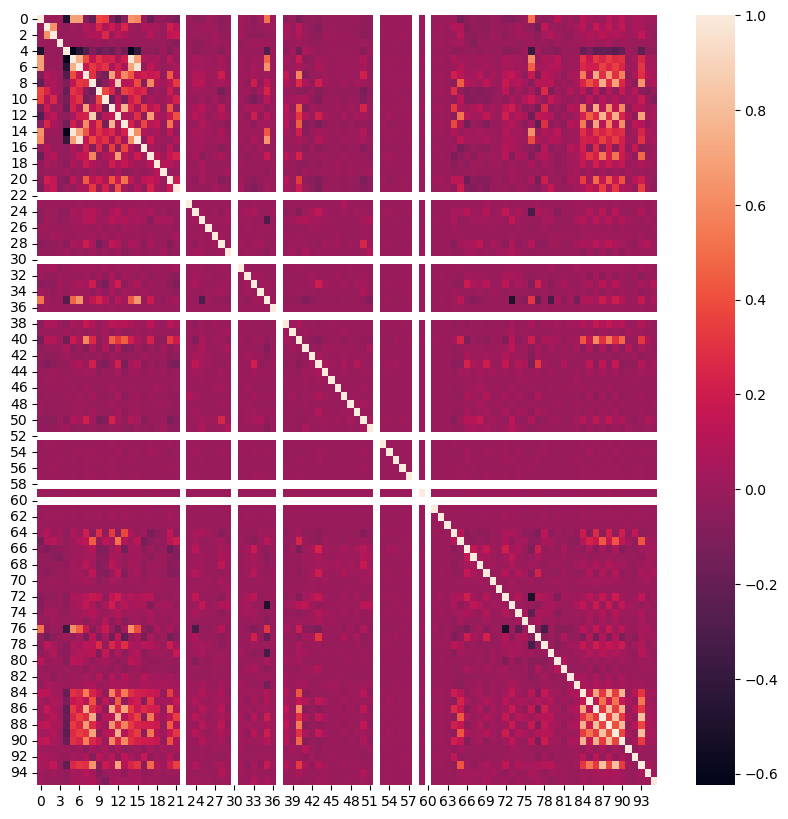

In [42]:
corr = pd.DataFrame(X).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr)

In [43]:
pd.DataFrame(X)[30].unique()

array([0.])

In [44]:
pca = PCA(n_components=96)
pca.fit(X)

,n_components,96
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


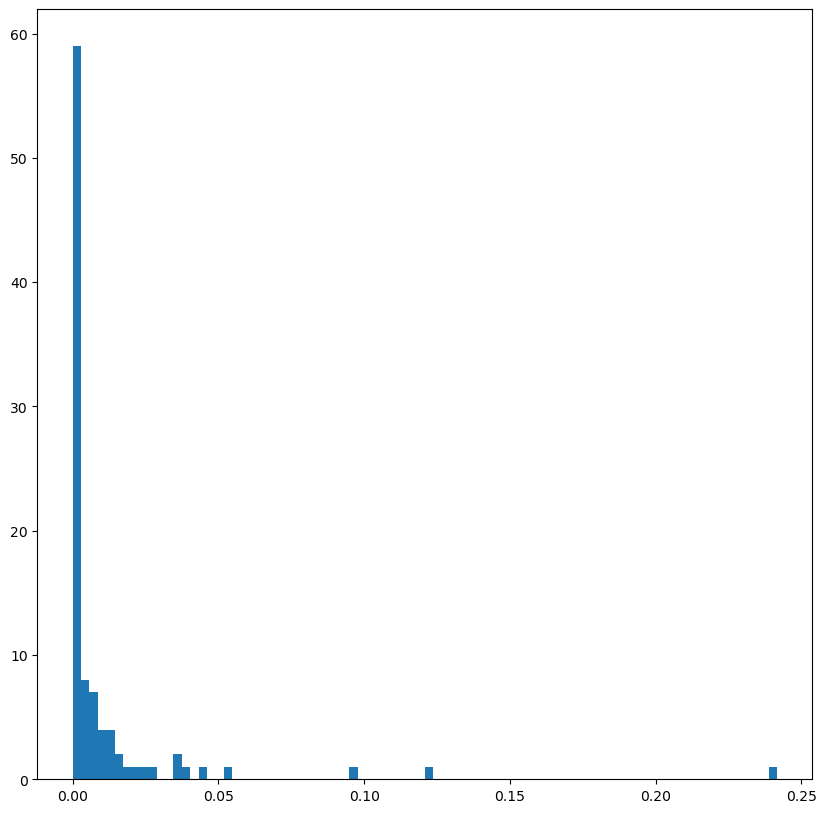

In [45]:
plt.figure(figsize=(10, 10))
plt.hist(pca.explained_variance_ratio_, bins=84)
plt.show()

In [46]:
def getKComponents(pca, alpha):
    total_variance = 0
    for feature, variance in enumerate(pca.explained_variance_ratio_):
        total_variance += variance
        if (total_variance >= 1 - alpha):
            return feature + 1
    return len(pca.explained_variance_ratio_)

In [47]:
K = getKComponents(pca, alpha=0.05)
K

33

In [48]:
X = pca.transform(X)[:, 0:K]
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-0.807650,-3.041170,-0.477923,-0.788150,-0.837791,0.305314,-0.571604,-0.640431,0.391012,-0.089662,-0.495636,-0.704256,-0.132945,0.290378,-0.053375,-0.286345,-0.442457,0.071405,0.449524,-0.293432,0.150031,0.105350,0.579702,-0.406736,-0.220961,0.062492,-0.033852,-0.065296,0.007777,-0.080869,-0.049944,-0.165961,0.056775
1,-0.403354,-2.516566,-0.271932,-1.210600,-0.940974,0.463845,-0.769151,-0.302018,-0.226065,-0.320548,-0.460276,-0.679912,0.045021,0.235292,0.007046,-0.176062,-0.365063,-0.012328,0.278339,-0.284343,-0.029642,0.107304,0.620166,-0.424848,0.001105,0.020463,0.051323,0.030929,-0.023390,0.045672,-0.006290,0.185634,0.072155
2,-1.793312,-1.452247,-0.282613,-1.090443,-0.785376,0.333237,-0.704440,-0.376257,0.147196,-0.330615,-0.485776,-0.710410,-0.036507,0.172980,0.001653,-0.105821,-0.332162,-0.061126,0.125140,0.014719,0.171936,0.159419,-0.085199,0.156083,0.008170,-0.026589,0.010115,0.146338,-0.054307,0.084381,-0.020325,0.149910,0.107855
3,-1.953921,-1.452769,-0.437852,-1.067899,-0.855280,0.367944,-0.569773,-0.317184,0.120949,-0.332918,-0.516474,-0.668165,0.079321,0.194538,0.028993,-0.090496,-0.250764,-0.055677,0.128912,0.113210,0.054598,0.169202,-0.078491,0.102953,0.022223,0.006126,0.070663,0.069446,-0.048108,0.049091,-0.094075,0.219295,-0.199274
4,-0.531003,-3.044842,-0.766788,-0.128865,-0.392524,0.306517,-0.459914,-0.600220,0.627068,-0.421338,-0.432396,-0.681997,-0.142113,0.180613,-0.053757,0.058049,-0.229754,0.018191,0.356925,-0.130823,0.198088,-0.084058,0.729888,-0.332748,-0.130514,-0.103789,0.085502,-0.007072,-0.034536,0.101459,-0.186271,0.057514,-0.024417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,-2.662008,1.291910,1.542080,0.772222,-0.739458,-0.647647,0.687017,-0.644861,-1.184389,0.700592,-0.089520,1.091306,1.103918,-0.812106,0.702610,0.735058,-0.087271,0.006881,-0.023863,0.255993,0.098711,-0.581421,-0.101480,0.002813,0.159939,0.097054,-0.472091,-0.097370,-0.511502,-0.017211,-0.110692,-0.203674,0.171138
122406,0.110277,-2.209320,0.228796,1.364919,-0.437793,-0.861938,-0.019721,0.045146,-0.401692,0.860939,0.359920,0.762484,-0.330236,0.081040,-0.033202,-0.042262,0.001624,-0.164584,0.203243,0.056834,-0.038676,0.221176,-0.146084,0.229384,0.662024,0.323117,-0.426443,-0.007367,-0.088607,0.094928,0.059359,-0.130469,0.205325
122407,2.375611,0.942436,1.160162,-0.669273,1.450319,1.070238,0.582792,0.596464,-1.143166,1.541248,-0.302512,1.177637,-1.198107,-0.092353,-0.378891,-0.437141,-0.880029,-0.133252,0.043979,-0.614435,0.041570,0.335376,0.236874,0.833349,0.424366,-0.131201,0.113948,-0.116364,-0.103917,0.191911,-0.500739,-0.255426,0.079432
122408,1.905041,0.618990,1.723658,-0.066840,0.992627,1.524162,0.628238,0.485320,-1.258091,1.679712,-0.323927,1.072950,-1.227808,-0.182669,-0.253467,-0.611584,-0.794985,-0.038496,0.211720,-0.047896,-0.841325,0.151717,0.212650,0.700360,0.455182,-0.235973,0.224711,-0.127013,-0.221656,0.129971,-0.494348,-0.006301,-0.281792


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [50]:
log_model = LogisticRegression(verbose=True)
nn_model = MLPClassifier(verbose=True)

log_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Iteration 1, loss = 0.49296847
Iteration 2, loss = 0.45869654
Iteration 3, loss = 0.45253645
Iteration 4, loss = 0.44862227
Iteration 5, loss = 0.44579222
Iteration 6, loss = 0.44334001
Iteration 7, loss = 0.44131809
Iteration 8, loss = 0.43938626
Iteration 9, loss = 0.43771641
Iteration 10, loss = 0.43620556
Iteration 11, loss = 0.43492353
Iteration 12, loss = 0.43356215
Iteration 13, loss = 0.43211741
Iteration 14, loss = 0.43112508
Iteration 15, loss = 0.42999642
Iteration 16, loss = 0.42885244
Iteration 17, loss = 0.42765587
Iteration 18, loss = 0.42691433
Iteration 19, loss = 0.42576874
Iteration 20, loss = 0.42445537
Iteration 21, loss = 0.42382255
Iteration 22, loss = 0.42292625
Iteration 23, loss = 0.42220135
Iteration 24, loss = 0.42139828
Iteration 25, loss = 0.42084537
Iteration 26, loss = 0.41988133
Iteration 27, loss = 0.41916427
Iteration 28, loss = 0.41862403
Iteration 29, loss = 0.41746612
Iteration 30, loss = 0.41713799
Iteration 31, loss = 0.41651807
Iteration 32, los

/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [51]:
print(f"Logistic Model: {log_model.score(X_test, y_test)}")
print(f"Neural Network Model: {nn_model.score(X_test, y_test)}")

Logistic Model: 0.7425863900008169
Neural Network Model: 0.773098603055306
